In [1]:
import pandas as pd
pam50 = pd.read_csv("Data_Pam50.csv")
pam50

,Unnamed: 0,subtype,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,...,PGR,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T
0,Normal.Breast.10,Normal,-1.151,-3.736,0.260,1.300,-2.860,-0.569,-2.981,-1.962,...,0.794,-1.027,-2.650,-3.928,3.106,-1.138,-2.093,-4.36,-1.448,-3.382
1,Normal.Breast.2,Normal,-0.485,-3.739,0.591,1.580,-3.250,-0.533,-2.935,-1.086,...,1.386,-0.988,-2.386,-4.659,3.669,0.048,-0.933,-4.05,-2.615,-2.746
2,Normal.Breast.3,Normal,0.298,-2.848,0.359,1.292,-2.493,-0.687,-2.810,-1.194,...,0.428,-0.729,-1.658,-3.770,3.268,-0.796,-1.909,-2.86,-0.708,-2.744
3,Normal.Breast.4.Custom,Normal,1.153,-4.717,0.098,1.954,-3.237,-0.535,-3.558,-2.185,...,0.638,-0.543,-2.828,-4.536,3.350,-2.167,-3.274,-4.12,-2.065,-3.742
4,Normal.Breast.7,Normal,-0.287,-3.681,0.441,1.911,-2.156,-0.965,-2.869,-1.129,...,1.413,-1.070,-2.248,-3.798,3.175,-1.054,-0.597,-3.80,-1.847,-2.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,H1AUNC.1319.C,LumB,-0.267,-0.803,-0.409,0.329,0.179,1.542,-0.854,-1.170,...,0.025,-3.197,-0.672,-2.491,-3.184,0.123,-1.894,-1.05,0.012,-0.051
68,H1AUNC.1323.C,LumB,-0.938,-1.999,-0.910,0.472,-1.564,0.352,-1.842,-1.520,...,0.075,-2.252,-1.343,-1.403,-3.064,1.579,0.920,-1.47,-0.196,-0.550
69,H1AUNC.1462.C,LumB,-0.950,-1.757,0.250,0.099,-1.289,1.219,-1.135,-1.270,...,1.004,-3.621,-0.772,-1.862,-1.936,-1.458,-0.892,-2.19,-0.294,-1.046
70,H1AUNC.1471.C,LumB,0.039,-1.937,0.095,0.137,-0.948,2.833,-1.669,-0.911,...,0.269,-3.909,-1.734,-1.778,-1.255,2.368,0.204,-1.86,-1.492,-1.227


Pour chacun des 72 échantillons, nous avons :
 - un nom (Unnamed:0), 
 - un subtype, correspondant au type de cancer observé,
 - le niveau d'expression relative de 50 gènes(ACTR3B à UBE2T),

In [12]:
features = pam50[pam50.columns[2:]]
labels = pam50["subtype"]
print("features :", list(features.columns))
print()
print("labels :", labels.unique())

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

if(set(train_labels.unique()) != set(test_labels.unique())) :
    print()
    print("Erreur, tous les labels ne sont pas présents dans les deux sets !")

features : ['ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 'CDC20', 'CDC6', 'CDCA1', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GPR160', 'GRB7', 'KIF2C', 'KNTC2', 'KRT14', 'KRT17', 'KRT5', 'MAPT', 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC', 'NAT1', 'ORC6L', 'PGR', 'PHGDH', 'PTTG1', 'RRM2', 'SFRP1', 'SLC39A6', 'TMEM45B', 'TYMS', 'UBE2C', 'UBE2T']

labels : ['Normal' 'Basal' 'Her2' 'LumA' 'LumB']


Nous cherchons à prédire le subtype d'un cancer du sein à partir du niveau d'expression de ses gènes.
Ainsi, nous extrayons les niveaux d'expressions (colonnes 2 à 50) en tant que features et les subtypes en tant que labels

On sépare ensuite le jeu de données d'apprentissage, utilisé pour construire l'arbe décisionnel, du jeu de données de test, utilisé pour vérifier l'efficacité de l'entrainement. Etant donnée la petite taille de notre jeu de données, vérifie que tous les labels sont présents dans les deux sets.


In [3]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier = classifier.fit(train_features, train_labels)


Il existe plusieurs paramètres pour le DecisionTreeClassifier, mais les paramètres par défauts sont les plus efficaces dans notre cas. Seul max_debth semble avoir un effet positif sur l'accuracy moyenne (75% => 78%)

Les paramètres tels que ccp_alpha ou max_features peuvent être utiles pour combattre l'overfitting, mais étant donnée la faible taille de notre jeu de données, ce n'est pas vraiment un problème pour nous.

              precision    recall  f1-score   support

       Basal       0.75      1.00      0.86         3
        Her2       1.00      0.50      0.67         2
        LumA       1.00      1.00      1.00         2
        LumB       1.00      1.00      1.00         2
      Normal       0.50      0.50      0.50         2

    accuracy                           0.82        11
   macro avg       0.85      0.80      0.80        11
weighted avg       0.84      0.82      0.81        11



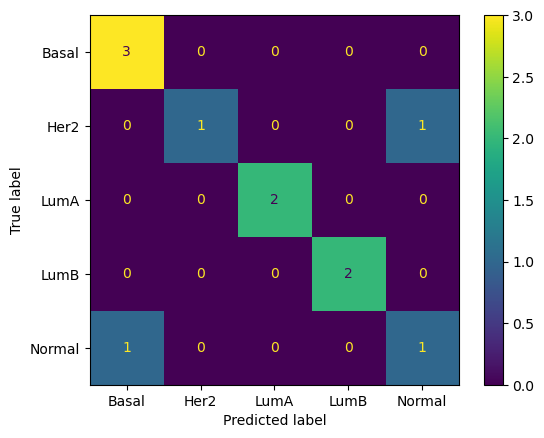

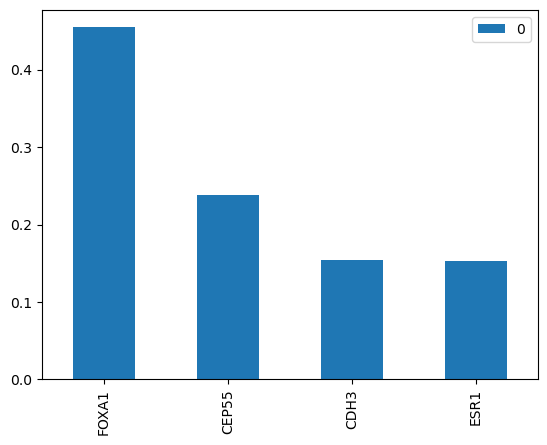

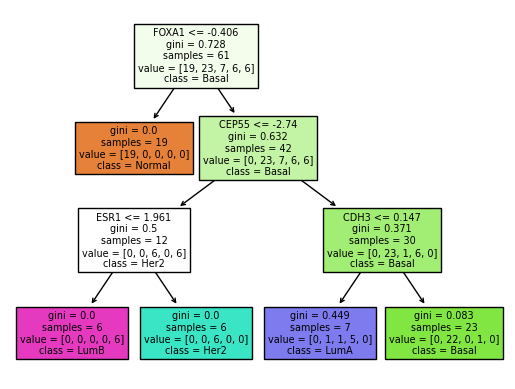

In [6]:
# Prédiction
predictions = classifier.predict(test_features)
predict_probas = classifier.predict_proba(test_features)

# Métriques des prédictions
from sklearn import metrics 
print(metrics.classification_report(test_labels, predictions, zero_division = 0))

# Matrice de confusion
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(test_labels, predictions),display_labels = ["Basal","Her2","LumA","LumB","Normal"]).plot()

# Feature importance
feature_importance = pd.DataFrame(classifier.feature_importances_, index = features.columns).sort_values(0, ascending=False)
feature_importance = feature_importance[feature_importance[0] > 0]
feature_importance.plot(kind = "bar")

# Représentation de l'arbre
import matplotlib.pyplot as plt
fig = plt.figure()
tree.plot_tree(classifier, 
    feature_names=list(features.columns),
    class_names=labels.unique(),
    filled=True)
fig.savefig("decistion_tree.png")